In [67]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control.oc_utils.plot_oc import ops_plotall, ops_plotsubset, ops_plot_acp_inits, ops_plot_timing_inits, get_prc, plot_pcr
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
wc = WCModel()
dist_array = [5.]

ep, em, ip, im, epim, emip, period = get_prc(wc, [1., 0.], dist_array)

In [69]:
dt = 0.01

for i in range(len(dist_array)):
    min0, min1 = np.amin(np.abs(epim[i,:1000])), np.amin(np.abs(epim[i,1000:]))
    i0 = np.where(min0 == epim[i,:1000])
    i1 = np.where(min1 == epim[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print(f"advance : %5.3f, %5.2f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.2f, %5.2f"% ((i00 +2+ i11)/2, i00+2.-i11))

    min0, min1 = np.amin(np.abs(emip[i,:1000])), np.amin(np.abs(emip[i,1000:]))
    i0 = np.where(min0 == emip[i,:1000])
    i1 = np.where(min1 == emip[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print(f"advance : %5.3f, %5.2f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.2f, %5.2f" % ((i00 +2+ i11)/2, i00+2.-i11))
    print("----------------------------------------")

advance : 1.004,  1.39
delay :  1.98,  0.55
advance : 0.859,  1.46
delay :  1.84,  0.49
----------------------------------------


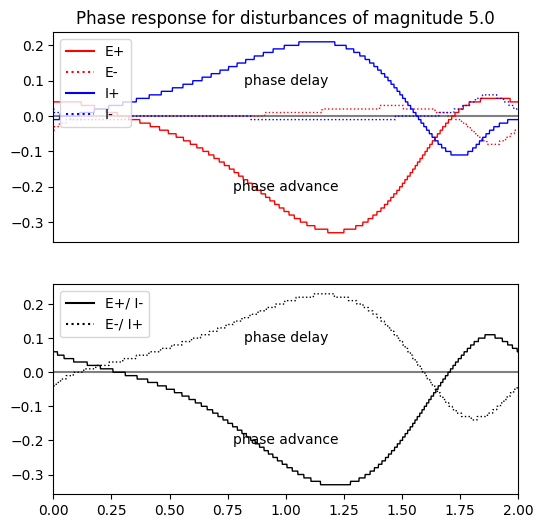

In [70]:
plot_pcr(ep, em, ip, im, epim, emip, dist_array, period, "pcr.png", "./")

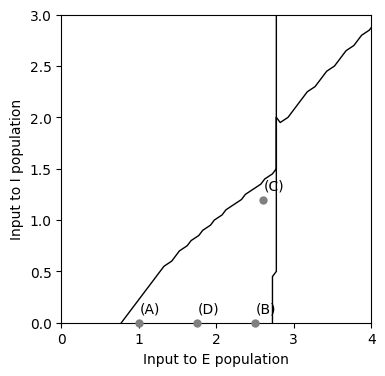

In [6]:
filehandler = open("../../data/boundary_bi.pickle","rb")
boundary_bi = pickle.load(filehandler)
filehandler.close()
boundary_bi_e = boundary_bi[0]
boundary_bi_i = boundary_bi[1]

filehandler = open("../../data/boundary_osc.pickle","rb")
boundary_LC = pickle.load(filehandler)
filehandler.close()
boundary_LC_e = boundary_LC[0]
boundary_LC_i = boundary_LC[1]

points = [[1., 0.], [2.5, 0.], [2.6, 1.2], [1.75, 0.]]
labels = ["(A)", "(B)", "(C)", "(D)"]

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(boundary_LC_e, boundary_LC_i, color='black', linewidth=1)
ax.plot(boundary_bi_e, boundary_bi_i, color='black', linewidth=1)
ax.set_xlabel('Input to E population')
ax.set_ylabel('Input to I population')
ax.set_xlim(0,4)
ax.set_ylim(0,3)

for i in range(4):
    p=points[i]
    ax.plot(p[0], p[1], marker=".", markersize=10, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.1, labels[i])

plt.show()

In [59]:
erange = np.arange(1.1, 3., 0.2)
irange = np.arange(.2, 1.9, 0.2)


points_test = []
for i in irange:
    e0 = np.where(boundary_LC_i > i)[0][0]
    e1 = np.where(boundary_LC_i[e0:] < i)[0][0] + e0

    if e0 >= e1+1:
        continue

    for e in erange:
        if np.amin(boundary_LC_e[e0:e1+1] - e) < 0:
            if np.amax(boundary_LC_e[e0:e1+1] - e) > 0:
                points_test.append([e,i])

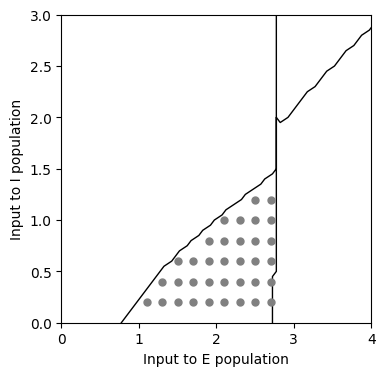

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(boundary_LC_e, boundary_LC_i, color='black', linewidth=1)
ax.plot(boundary_bi_e, boundary_bi_i, color='black', linewidth=1)
ax.set_xlabel('Input to E population')
ax.set_ylabel('Input to I population')
ax.set_xlim(0,4)
ax.set_ylim(0,3)

for i in range(len(points_test)):
    p=points_test[i]
    ax.plot(p[0], p[1], marker=".", markersize=10, color="grey", zorder=10, clip_on=False)

plt.show()

In [61]:
for p in points_test:
    wc = WCModel()
    dist_array = [5.]

    ep, em, ip, im, epim, emip, period = get_prc(wc, p, dist_array)

    if max(np.amax(np.abs(ep)), np.amax(np.abs(em))) < max(np.amax(np.abs(ip)), np.amax(np.abs(im))):
        print("found setting cond1", p)
        plot_pcr(ep, em, ip, im, epim, emip, dist_array, period, str(p[0]) + str(p[1]) + "pcr.png", "./")
        